In [15]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [23]:
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']

data=pd.read_excel('BettingAgainstBeta.xlsx', header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [28]:
factors=['BAB Factors','MKT','SMB','HML FF','HML Devil','UMD']
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']
data={}
for f in factors:
    data[f]=pd.read_excel('BettingAgainstBeta.xlsx', sheet_name=f,header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [31]:
data['QMJ']=pd.read_excel('QualityMinusJunk.xlsx', sheet_name=f,header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [34]:
data.keys()

['HML FF', 'BAB Factors', 'HML Devil', 'UMD', 'MKT', 'QMJ', 'SMB']

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


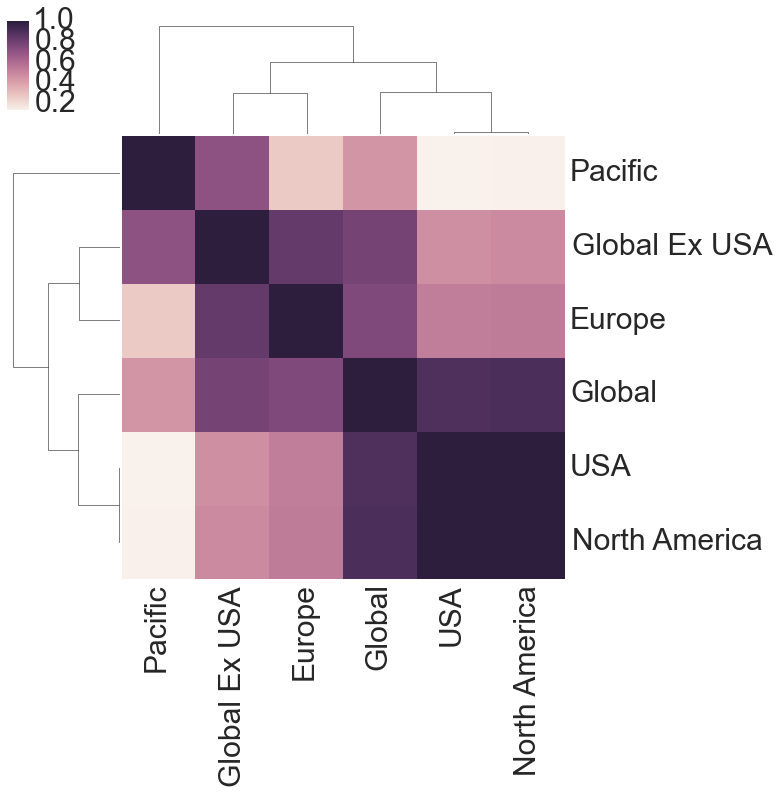

In [38]:
sns.clustermap(data['QMJ'].corr())

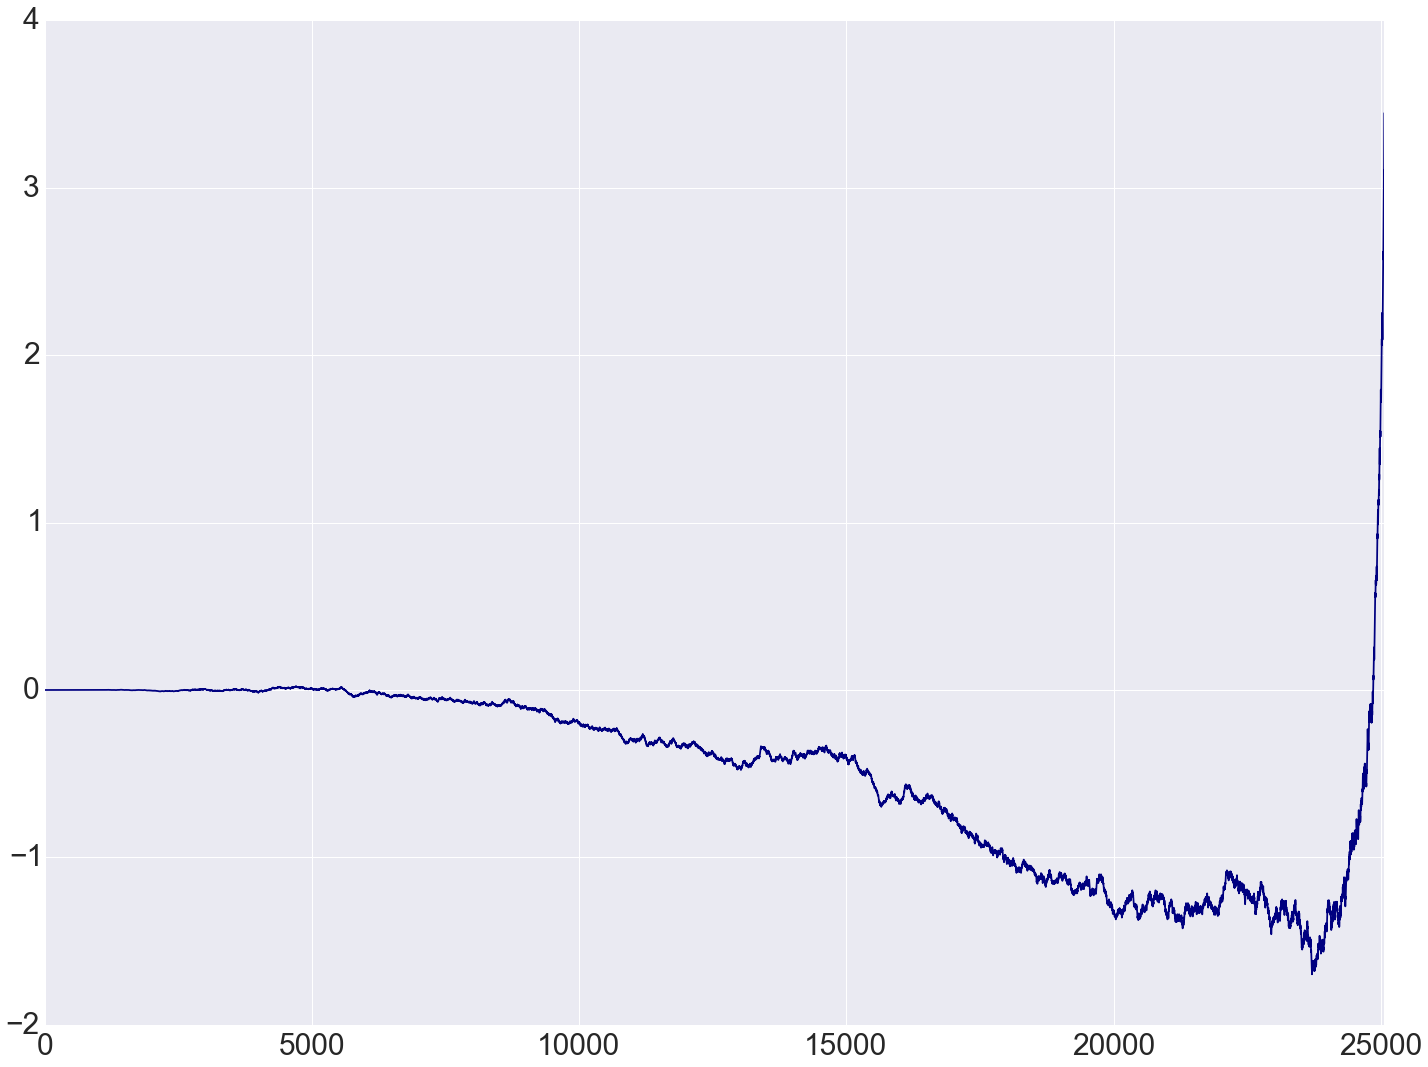

In [68]:
x=data['HML Devil'].USA
df=pd.DataFrame()
df['Original']=x
df['abs']=x.abs()
pd.Series(df.sort_values('abs').Original.values).cumsum().plot(colormap='jet')

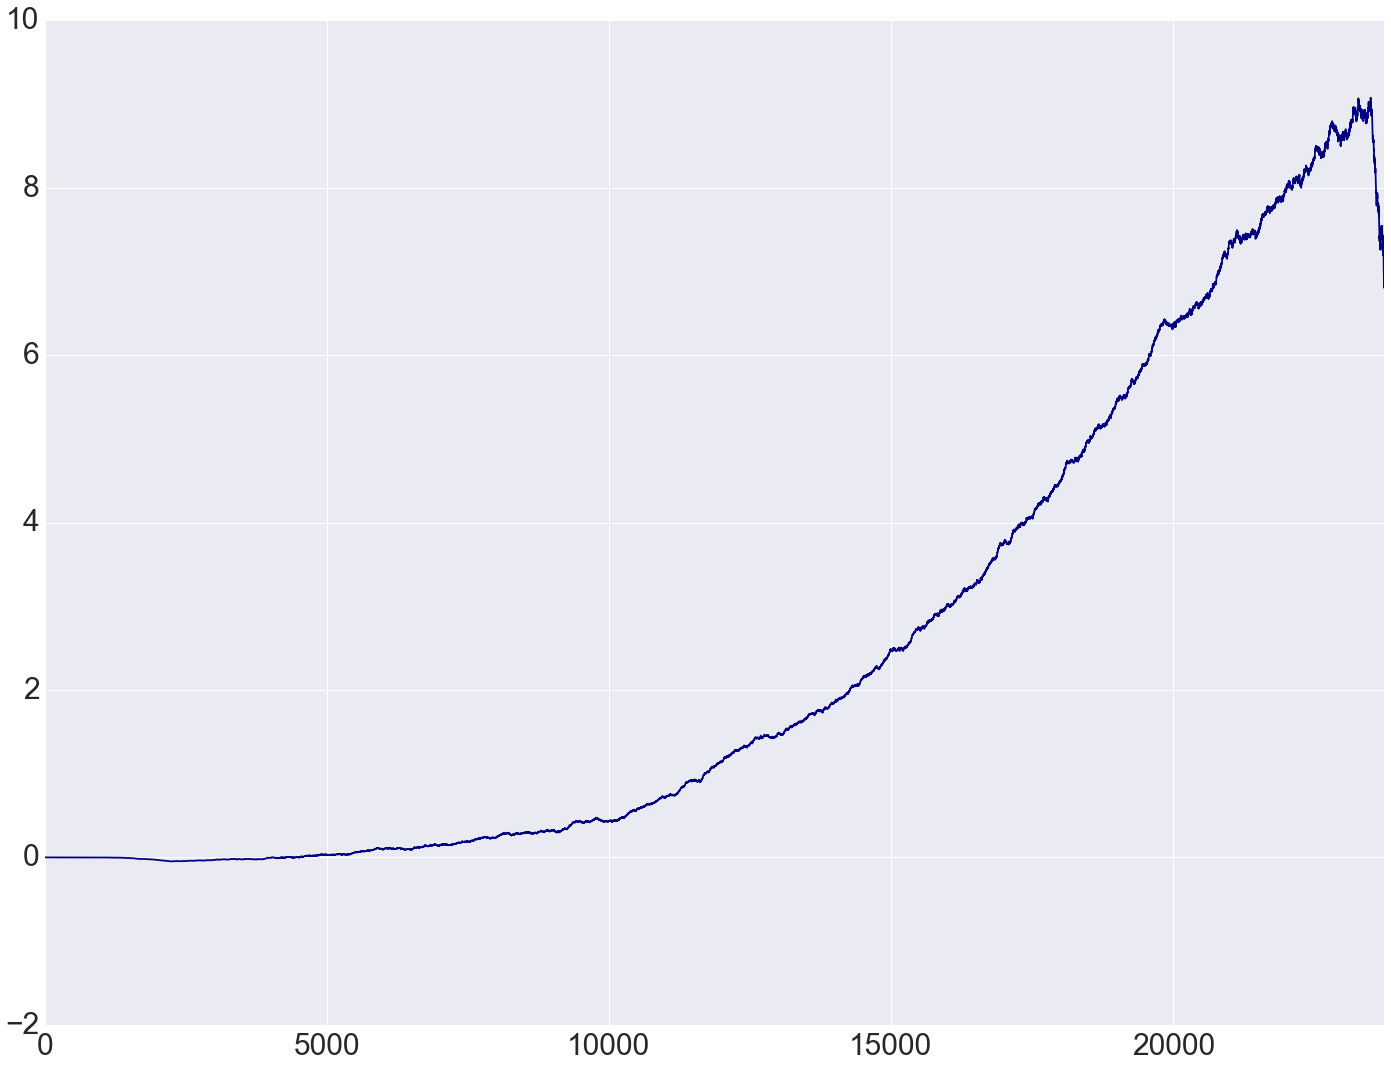

In [67]:
x=data['BAB Factors'].USA
df=pd.DataFrame()
df['Original']=x
df['abs']=x.abs()
pd.Series(df.sort_values('abs').Original.values).cumsum().plot(colormap='jet')

In [84]:
all_data=pd.DataFrame()
for f in data.keys():
    x=data[f].USA['1980':]
    df=pd.DataFrame()
    df['Original']=x
    df['abs']=x.abs()
    all_data[f]= pd.Series(df.sort_values('abs').Original.values).cumsum()

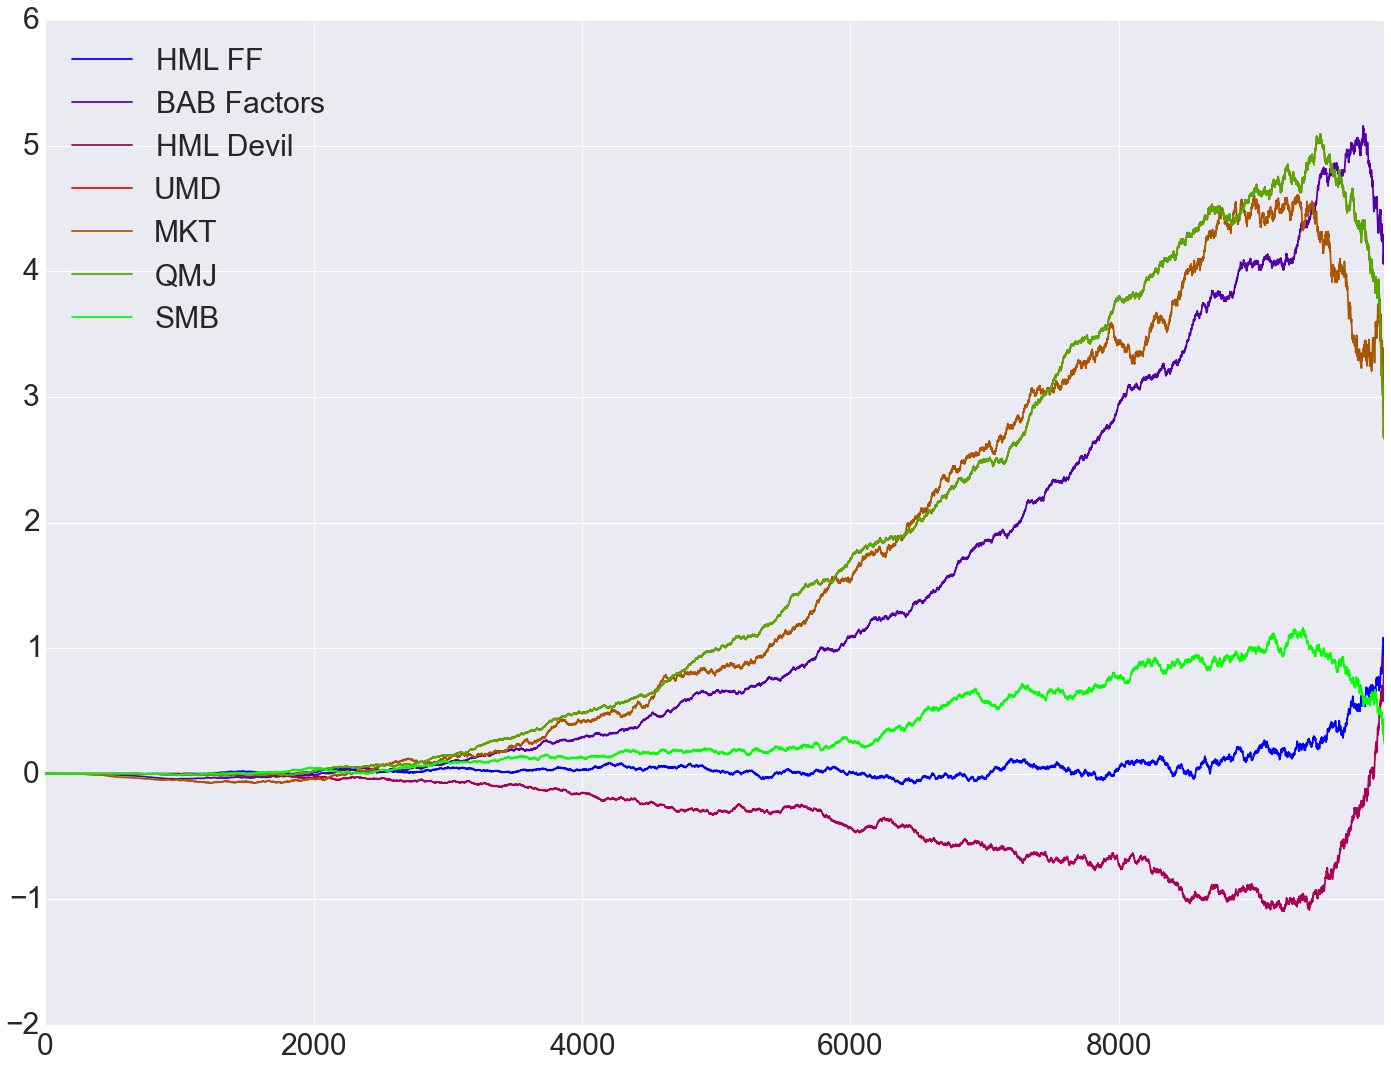

In [85]:
all_data.plot(colormap='brg')